<a href="https://colab.research.google.com/github/Soham1306/DLAssignments/blob/main/iris_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

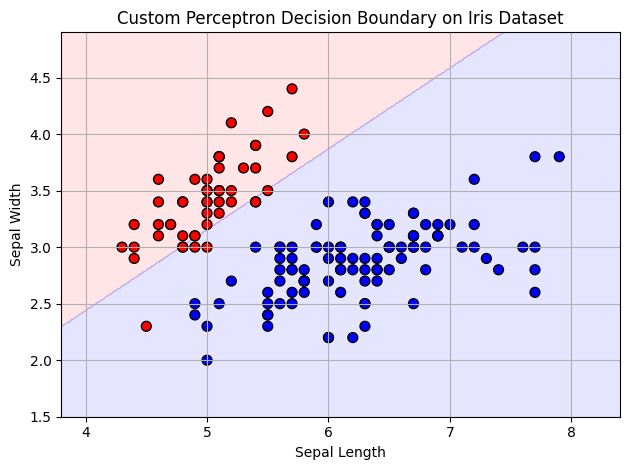

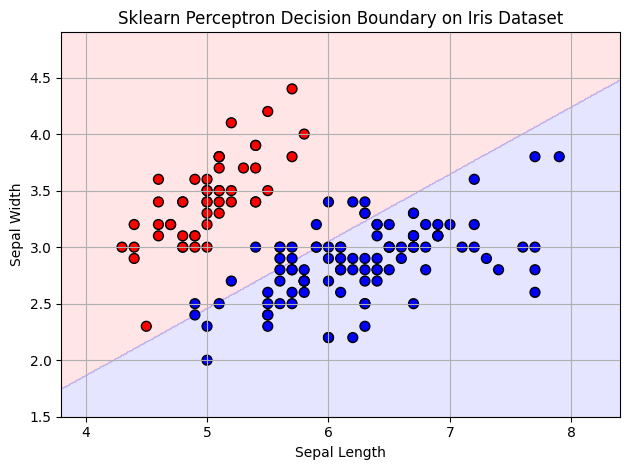

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import Perceptron as SklearnPerceptron

class PerceptronModel:
    """
    A simple implementation of the Perceptron algorithm for binary classification.
    """

    def __init__(self, learning_rate=0.1, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Train the perceptron on training data X and labels y.
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0
                error = y[i] - y_pred

                # Update rule for weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, X):
        """
        Predict class labels for input samples X.
        """
        X = np.atleast_2d(X)
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """
    Plot the decision boundary for a trained classifier along with input data points.
    """
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['red', 'blue'])

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolors='k', s=50)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    # Load Iris dataset from scikit-learn
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # Use sepal length and sepal width
    y = (iris.target != 0).astype(int)  # Binary classification: Setosa vs. non-Setosa

    # --- Custom Perceptron Implementation ---
    custom_model = PerceptronModel(learning_rate=0.1, max_iter=100)
    custom_model.fit(X, y)
    plot_decision_boundary(X, y, custom_model,
                           title="Custom Perceptron Decision Boundary on Iris Dataset")

    # --- Scikit-learn Perceptron ---
    sklearn_model = SklearnPerceptron(eta0=0.1, max_iter=100, tol=None, random_state=42)
    sklearn_model.fit(X, y)

    # Wrap scikit-learn model to make interface compatible
    class SklearnPerceptronWrapper:
        def __init__(self, model):
            self.model = model

        def predict(self, X):
            return self.model.predict(X)

    plot_decision_boundary(X, y, SklearnPerceptronWrapper(sklearn_model),
                           title="Sklearn Perceptron Decision Boundary on Iris Dataset")

if __name__ == "__main__":
    main()
